# Problem2

## Propecessing Data

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
pd.set_option('display.max_columns', 100)

In [2]:
chronic = pd.read_csv('realdata1/chronic_kidney_disease_full.csv',na_values = '?') 
chronic.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
# check how many lines contain nan
chronic.shape[0] - chronic.dropna().shape[0]

242

In [4]:
# too many instance with nan, so we have to impute missing rather than drop
# first handle the nominal data
# impute categorical use most frenquency
# for interpretation in future, I need to record the nominal map
chronic_str = chronic.select_dtypes(include=['object'])
str_name = []
for name in [_ for _ in chronic_str.columns.values]:
    print name, chronic[name].unique()
    str_name.append(name)

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
htn ['yes' 'no' nan]
dm ['yes' 'no' nan]
cad ['no' 'yes' nan]
appet ['good' 'poor' nan]
pe ['no' 'yes' nan]
ane ['no' 'yes' nan]
class ['ckd' 'notckd']


In [5]:
normal_abnormal = {'normal' : 0, 'abnormal' : 1}
notpresent_present = {'notpresent' : 0,'present' : 1}
no_yes = {'no' : 0, 'yes' : 1}
poor_good = {'poor' : 0, 'good' : 1}
notckd_ckd = {'notckd' : 0, 'ckd' : 1}

In [6]:
chronic['rbc'] = chronic['rbc'].map(normal_abnormal)
chronic['pc'] = chronic['pc'].map(normal_abnormal)
chronic['pcc'] = chronic['pcc'].map(notpresent_present)
chronic['ba'] = chronic['ba'].map(notpresent_present)
chronic['htn'] = chronic['htn'].map(no_yes)
chronic['dm'] = chronic['dm'].map(no_yes)
chronic['cad'] = chronic['cad'].map(no_yes)
chronic['appet'] = chronic['appet'].map(poor_good)
chronic['pe'] = chronic['pe'].map(no_yes)
chronic['ane'] = chronic['ane'].map(no_yes)
chronic['class'] = chronic['class'].map(notckd_ckd)

In [7]:
imp1 = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
chronic[str_name] = imp1.fit_transform(chronic[str_name])    

In [8]:
chronic.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
int_name = [_ for _ in chronic.columns.values if _ not in str_name]

In [10]:
imp2 = Imputer(missing_values='NaN', strategy='mean', axis=0)
chronic[int_name] = imp2.fit_transform(chronic[int_name])

In [11]:
chronic.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [12]:
chronic.to_csv('clean_chronic.csv',index = False)

In [13]:
train_x = chronic.iloc[: , :-1]
train_y = chronic.iloc[:, -1]

In [14]:
chronic.shape[1]

25

## Begin logistic regression

In [52]:
class LogisticRegression(object):
    '''
    parameters
    ---
       1. reg : float
           regularazation, will use l2 regularazation in this assignment
       2. eta : float
           learning rate
       3. iter_num : int
           iteration time
       4. tol: tolerance for converge
       
   attributes
   ---
       1. w_ : 1-d array
           weight of input vector
       2. cost_ : list of float
           cost of iterations
    '''
    def __init__(self, reg, tol):
        
        self.reg = reg
        self.eta = 0.0001
        # self.iter_num = 100
        self.cost_ = []
        self.tol = tol
        
    def fit(self, x, y) :
        
        # x should be input matrix, y should be target, x is pandas dataframe, y is pandas series
        # change to numpy first
        # do not forget w0
        x = np.array(x)
        y_true = np.array(y)
        self.w_ = np.ones((x.shape[1] + 1))
        
        
        logit_cost = self.__logit_cost(x, y_true)
        new_weight = np.zeros((x.shape[1] + 1))
        new_weight[0] = self.w_[0] -  self.eta * np.mean(self.__activation(x) - y)
        new_weight[1:] = self.__update_weights(x, y)
        self.cost_.append(self.__reg_cost(x, logit_cost))
        
        iter_time = 0
        while np.sqrt(np.sum(np.square(np.subtract(new_weight, self.w_)))) > self.tol:
            self.w_ = new_weight
            logit_cost = self.__logit_cost(x, y_true)
            new_weight = np.zeros((x.shape[1] + 1))
            new_weight[0] = self.w_[0] -  self.eta * np.mean(self.__activation(x) - y)
            new_weight[1:] = self.__update_weights(x, y)
            self.cost_.append(self.__reg_cost(x, logit_cost))
            iter_time += 1
            if iter_time > 40000:
                break
        
#         for _ in range(600):
#             self.w_ = new_weight
#             logit_cost = self.__logit_cost(x, y_true)
#             new_weight = np.zeros((x.shape[1] + 1))
#             new_weight[0] = self.w_[0] -  self.eta * np.mean(self.__activation(x) - y)
#             new_weight[1:] = self.__update_weights(x, y)
#             self.cost_.append(self.__reg_cost(x, logit_cost))       
        print 'finish' 
        
    def __safe_log(self, x):
        minval=0.000000000001
        return np.log(x.clip(min=minval))
    
    def __update_weights(self, x, y):
        return self.w_[1:] - self.eta * np.mean(np.dot(x.T,np.subtract(self.__activation(x),y))) - self.eta * self.reg * self.w_[1:]    
    
    def __reg_cost(self, x, logit_cost):
        cost_reg = logit_cost + (self.reg/ float(2)) * np.dot(self.w_[1:],self.w_[1:])
        return cost_reg

    def __logit_cost(self, x, y_true):
        # what will be return should be 1-d numpy array
        hx_log = self.__safe_log(self.__activation(x))
        hx_log2 = self.__safe_log(1 - self.__activation(x))
        cost_vec = - y_true.dot(hx_log) - ((1 - y_true).dot(hx_log2))
        return cost_vec
    
    def __activation(self, x):
        net_in = self.__net_input(x)
        return self.__sigmoid(net_in) 
        
    def __sigmoid(self, g):
        return 1.0 / (1.0 + np.exp(-g))
        
    def __net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0] 
    
    def predict(self, x):
        return np.where(self.__activation(x) >= 0.5, 1, 0)
    
    def get_weight(self):
        return self.w_
    
    def get_cost(self):
        return self.cost_
    
    
        
        

## Test Algorithm: use a popular dataset to test algorithm

In [369]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

In [370]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, 0)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [371]:
lr = LogisticRegression(1)
lr.fit(X_std, y)

finish


In [372]:
'''
    Reference: https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/logistic_regression.ipynb
'''

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

finish


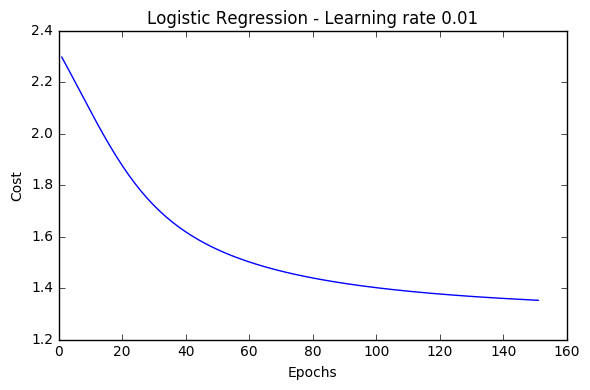

In [373]:
%matplotlib inline
import matplotlib.pyplot as plt

lr = LogisticRegression(reg = 1)
lr.fit(X_std, y)
plt.plot(range(1, len(lr.get_cost()) + 1), np.log10(lr.get_cost()))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.01')

plt.tight_layout()
plt.show()

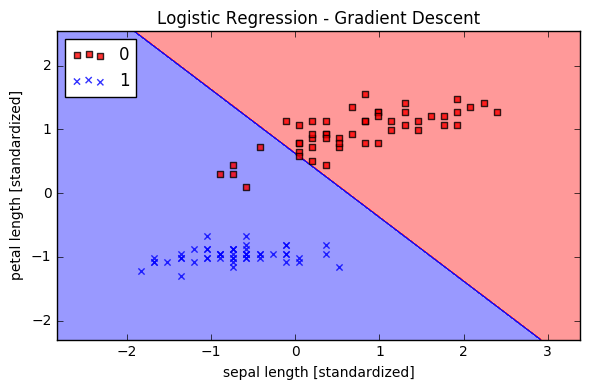

In [374]:
plot_decision_regions(X_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

## (b) Use realdataset, f score plot

- Here I just use tolerance as 10 and small learning rate.
- If after 40000 epoch do not converge, it still stop

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [73]:
f_scores = []
for reg in np.arange(-2, 4, 0.2):
    lr_real = LogisticRegression(reg, tol = 10)
    lr_real.fit(X_train, y_train)
    y_predict = lr_real.predict(X_test)
    f_scores.append(f1_score(y_test, y_predict))

/Users/boyazhou/py_env/py27/lib/python2.7/site-packages/ipykernel/__main__.py:88: RuntimeWarning: overflow encountered in exp


finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish


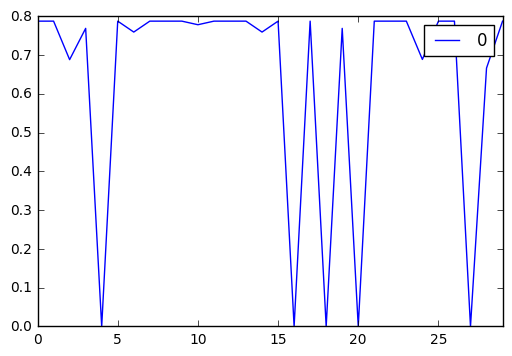

In [74]:
pd.DataFrame(f_scores).plot()

## (c) use standardization data

In [47]:
from sklearn import preprocessing

In [48]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_x)

In [49]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X_train_minmax, train_y, test_size=0.2, random_state=42)

In [70]:
f_scores_std = []
for reg in np.arange(-2, 4, 0.2):
    lr_real_std = LogisticRegression(reg, tol = 0.000001)
    lr_real_std.fit(X_train_std, y_train)
    y_predict = lr_real_std.predict(X_test_std)
    f_scores_std.append(f1_score(y_test, y_predict))

finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish
finish


In [71]:
f_scores_std

[0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796,
 0.78787878787878796]

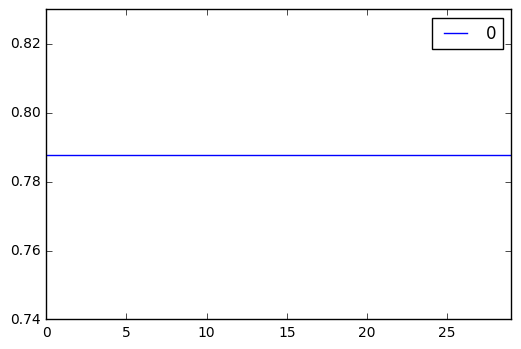

In [72]:
pd.DataFrame(f_scores_std).plot()